In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_csv('Classified Data')

In [4]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
scaler.fit(df.drop(['TARGET CLASS'],axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
scaled_features= scaler.transform(df.drop(['TARGET CLASS'],axis=1))

In [9]:
scaled_df = pd.DataFrame(data= scaled_features,columns =df.columns[:-1]  )

In [10]:
scaled_df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = scaled_df
y= df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(1)

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
pred = knn.predict(X_test)

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[189  15]
 [ 21 175]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       204
           1       0.92      0.89      0.91       196

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [20]:
error_rate=[]

In [21]:
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

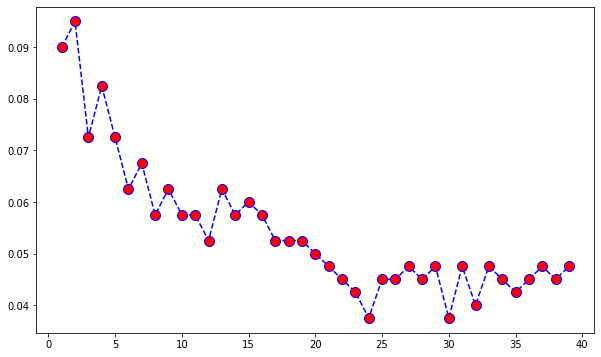

In [22]:
plt.figure(figsize= (10,6))
plt.plot(range(1,40),error_rate,ls = '--',marker = 'o',color='blue',markerfacecolor ='red',markersize = 10)

In [23]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[194  10]
 [  8 188]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       204
           1       0.95      0.96      0.95       196

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.96       400



In [29]:
import plotly.express as pt
pt.scatter(x=range(1,40),y=error_rate,)

In [37]:

find_k=pd.DataFrame(list(zip(range(1,40),error_rate)),columns=['k','error'])
find_k['exp']= find_k['k']+10
find_k.head()

,k,error,exp
0,1,0.0900,11
1,2,0.0950,12
2,3,0.0725,13
3,4,0.0825,14
4,5,0.0725,15


In [40]:
pt.scatter(find_k,x='k',y='error',color='error',size='error',text='k')

In [1]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))
print(saved_model_path)

./imdb_bert


In [1]:
import tensorflow as tf

In [9]:
file=tf.keras.utils.to_categorical([0,1,2,1,3],num_classes=4,dtype='int32')

In [10]:
file

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

In [11]:
type(file)

numpy.ndarray

In [18]:
z='abcdefgh'
z=list(z)
v=[1,2,3,4,5,6,7,8]

In [19]:
k={a:p for (a,p) in zip(z,v)}
k

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}

In [27]:
k.keys()

dict_keys(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])

In [28]:
type(k.keys())

dict_keys

In [29]:
list(k.keys())

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [30]:
mapping={'bangalore':12,'kuchinda':18,'jharsuguda':27}

In [32]:
delivery_charge={k:v for (k,v) in zip(list(mapping.keys()),[100,118,127])}
print(delivery_charge)


{'bangalore': 100, 'kuchinda': 118, 'jharsuguda': 127}


In [14]:
class Car():
    base_price=1000
    global total_price
    total_price=0
    mapping={'bangalore':12,'kuchinda':18,'jharsuguda':27}
    mapping_c={'light_blue':12,'green':18,'navy_blue':27}

    def __init__(self,colour):
        #self.price=price
        self.colour=colour
    
    def ask_quotation(self,location='kuchinda'):
        self.location=location
        global total_price
        if self.location in Car.mapping.keys():
            self.base_plus_loc=Car.mapping[self.location]+Car.base_price
            
            total_price= self.base_plus_loc
            print(total_price)
            
            if self.colour in Car.mapping_c.keys():
                self.base_loc_colour= self.base_plus_loc+Car.mapping_c[self.colour]
                print(f"""Price of the "{self.colour}" Car without delivery adds upto {self.base_loc_colour}""")
                total_price=self.base_loc_colour
                print(total_price)
                return self.base_loc_colour


        else:
            print('Fuck Off! You cant get one!')
            return 1000
        

        #print('price is:', Car.price1)
        #print('Self Price is:',self.price)

import re
def how_are_you():
    inp=input('How are you my dear Friend:')
    pos=re.findall('good|great|nice|awesome|awsm',inp)
    neg=re.findall("bad|not good|worst|hectic",inp)
    if len(pos)>=1:
        print('Glad to know that')
    elif len(neg)>=1:
        print('Sorry to know that')

In [15]:


class Delivery(Car):
    delivery_charge=120
    def __init__(self,colour='navy-blue'):
        loc=input('enter your location:',)        
        #Super().__init__(Car)
        base_price=Car.base_price
        mapping_loc=Car.mapping
        mapping_c=Car.mapping_c
        self.colour=colour
        #self.location=loc
        delivery_charge={k:v for (k,v) in zip(list(mapping_loc.keys()),[100,118,127])}

        
    def print_wbs(self):
        price=Car.ask_quotation(self,loc)
        #self.wbs_price=price
        sum_total=price+delivery_charge[loc]
        print('Sum total is:',sum_total)
        return sum_total

    def know(self):
        v=Delivery.print_wbs(self)
        print(v)
        
        

In [16]:
z=Car('navy_blue').ask_quotation('kuchinda')


1018
Price of the "navy_blue" Car without delivery adds upto 1045
1045


In [11]:
#global x
#x=11
def tt():
    nonlocal x
    x='local x'
    
    print(x)
    
tt()

def pp():
    print('pp x is :',x)

 
pp()

SyntaxError: no binding for nonlocal 'x' found (<ipython-input-11-3b38b18a4d20>, line 4)

In [4]:
global x
x=11
def test():
    
    x='local x'
    print(x)
    
    def p():
        nonlocal x
        x='protected x'
        def q():
            global x
            print('The global value of x is:',x)
            x='aaaaaaaaa'
            print(x)
        q()
        print(x)
    p()  
    print(x)
test()
print(x)

local x
The global value of x is: 11
aaaaaaaaa
protected x
protected x
aaaaaaaaa


In [7]:
def decorator_function(original_function):
    def wrapper_function():
        return original_function
    return wrapper_function()

def greet():
    print('Nice to meet you')
    
hi_func=decorator_function(greet)
hi_func()

Nice to meet you


# Decorators

In [ ]:
def decorator_function(original_function):
    def wrapper_function():
        return original_function
    return wrapper_function

def greet():
    print('Nice to meet you')
    
hi_func=decorator_function(greet)
hi_func()

In [9]:
def decorator_function(original_function):
    def wrapper_function():
        print(f'This wrapper function executed before{original_function.__name__}')
        return original_function()
    return wrapper_function

@decorator_function
def greet():
    print('Nice to meet you')
    
greet()

This wrapper function executed beforegreet
Nice to meet you


In [17]:
def decorator_function(original_function):
    def wrapper_function(*args,**kwargs):
        print(f'This wrapper function executed before{original_function.__name__}')
        return original_function(*args,**kwargs)
    return wrapper_function

@decorator_function
def greet():
    print('Nice to meet you')

@decorator_function
def take():
    print('What would you like to have')
    
greet()

take()

This wrapper function executed beforegreet
Nice to meet you
This wrapper function executed beforetake
What would you like to have


In [21]:
class decorator_class(object):
    
    def __init__(self,original_function):
        self.original_function=original_function
    
    def __call__(self,*args,**kwargs):
        print(f'The call constructor executes before the "{self.original_function.__name__}" function')
        return self.original_function(*args,**kwargs)
    
    
@decorator_class
def greet():
    print('Nice to meet you')

@decorator_class
def take():
    print('What would you like to have')
    
greet()

take()

The call constructor executes before the "greet" function
Nice to meet you
The call constructor executes before the "take" function
What would you like to have


In [27]:
import time
def my_timer(original_functions):
    import time
    def wrapper_func(*args,**kwargs):
        now=time.time()
        result=original_functions(*args,**kwargs)
        final=time.time()-now
        print(f'The time taken is {final}')
        print('The value of result is ',type(result))
        return result
    return  wrapper_func
        
@my_timer       
def greet():
    time.sleep(1)
    print('Hello! How are you')
@my_timer
def display_info(name,age):
    time.sleep(4)
    print(f"The display_info with {name} and {age} params ")
    
greet()
display_info('Pritam','26')

Hello! How are you
The time taken is 1.0110204219818115
The value of result is  <class 'NoneType'>
The display_info with Pritam and 26 params 
The time taken is 4.013383388519287
The value of result is  <class 'NoneType'>
